## Project: CEERS AGN Search

*Name:* Thresa Kelly

*Professor:* Dr. Allison Kirkpatrick

*Start Date:* 12/2/21

*End Date:* tbd

*Science Goal:* Which galaxies in the EGS field are likely AGN, and what are their physical properties?

*Details:* CEERS is an approved project on JWST to observe the Extended Groth Strip with the NIRCam, NIRSpec, and MIRI instruments. Thresa is going to identify AGN in the MIRI field of view. She will plot their spectral energy distributions, look for spectra in the 3D-HST database, look for radio observations through the FIRST database, and make images.



## Milestone: Read the .csv file

In [9]:
# imports 
from astropy.io import ascii

# read data from file 
data = ascii.read("EGS_for_Thresa.csv")

# view data
print(data.columns)

<TableColumns names=('ID','RA','Dec','Redshift','u','u Unc','g','g Unc','r','r Unc','i','i Unc','z','z Unc','y','y Unc','IRAC Ch 1','Ch 1 Unc','IRAC Ch 2','Ch 2 Unc','IRAC Ch 3','Ch 3 Unc','IRAC Ch 4','Ch 4 Unc','PACS 100','100 Unc','PACS 160','160 Unc','SPIRE 250','250 Unc','SPIRE 350','350 Unc','SPIRE 500','500 Unc')>


## Milestone: Which wavelengths correspond with which filters in the .csv file?



'u' = ultraviolet: λeff= 365 nm, Δλ= 66 nm

'g' = green: λeff= 464 nm, Δλ= 128 nm

'r' = red: λeff= 658 nm, Δλ= 138 nm

'i' = infared: λeff= 806 nm, Δλ= 149 nm

'z' = infared: λeff= 900 nm

'y' = infared: λeff= 1020 nm, Δλ= 120 nm

'IRAC Ch 1' =  Infrared Array Camera channel 1: λcenter= 3.56 um

'IRAC Ch 2' =  Infrared Array Camera channel 2: λcenter= 4.54 um

'IRAC Ch 3' =  Infrared Array Camera channel 3: λcenter= 5.73 um

'IRAC Ch 4' =  Infrared Array Camera channel 4: λcenter= 7.91 um

'PACS 100' = Photodetector Array Camera and Spectrometer: 100 um

'PACS 160' = Photodetector Array Camera and Spectrometer: 160 um

'SPIRE 250' = Photometer: 250 um

'SPIRE 350' = Photometer: 350 um

'SPIRE 500' = Photometer: 500 um

* Filters: https://en.wikipedia.org/wiki/Photometric_system
* IRAC paper: https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.145.2828&rep=rep1&type=pdf#:~:text=IRAC%20is%20a%20four%2Dchannel,%3B%204.5%20and%208%20m).
* PACS: https://www.cosmos.esa.int/web/herschel/pacs-overview 
* Spire: https://www.cosmos.esa.int/web/herschel/first-light

## Milestone: Select galaxies in the MIRI field of view 

Tips:
* use tools from class project
* CEERS proposals → look at tables in front
* table lists RA and DEC of 4 MIRI pointings (ex EGS7)
* MIRI FOV = 113 as (?)
* calculate angular distance of object to center of MIRI pointing. if <1.9am, keep object. if >1.9am, throw out object.
* .csv RA and DEC already in decimal degrees

Notes:
* This part is postponed, we are not sure the exact FOV for JWST yet. 

In [10]:
# imports 
import numpy as np 

# the four MIRI pointings:
#   MIRI-EGS7   RA= 14 20 14.6913  DEC= +52 55 25.43
#   MIRI-EGS8   RA= 14 19 57.9690  DEC= +52 55 51.53
#   MIRI-EGS9   RA= 14 19 52.2788  DEC= +52 51 40.09
#   MIRI-EGS10  RA= 14 19 35.6531  DEC= +52 52 6.56

miri_7_ra  = (14.*15.) + (20./4.) + (14.6913/240.)   # hrs*15 + minutes/4 + seconds/240
miri_7_dec = +( 52. + (55./60.) + (25.43/3600.) )      # + or -  ( degrees + minutes/60 + seconds/3600 )

miri_8_ra  = (14.*15.) + (19./4.) + (57.9690/240.)
miri_8_dec = +( 52. + (55./60.) + (51.53/3600.) )

miri_9_ra  = (14.*15.) + (19./4.) + (52.2788/240.)
miri_9_dec = +( 52. + (51./60.) + (40.09/3600.) )

miri_10_ra  = (14.*15.) + (19./4.) + (35.6531/240.)
miri_10_dec = +( 52. + (52./60.) + (6.56/3600.) )       # TODO: I could make the ra/dec conversions as a function. It would be more elegant. 

# Add all miri ra and dec into arrays
miri_ra  = [miri_7_ra, miri_8_ra, miri_9_ra, miri_10_ra]
miri_dec = [miri_7_dec, miri_8_dec, miri_9_dec, miri_10_dec]

print(miri_ra)
print(miri_dec)

# find average position
miri_ra_avg  = np.average(miri_ra)
miri_dec_avg = np.average(miri_dec)

print(miri_ra_avg)
print(miri_dec_avg)

# MIRI field of view is 113 as = 0.0313889 deg
miri_fov = 0.0313889 


[215.06121375, 214.9915375, 214.96782833333333, 214.89855458333332]
[52.92373055555555, 52.93098055555555, 52.861136111111115, 52.86848888888889]
214.97978354166665
52.896084027777775


In [11]:
# Function below by Dr. Kirkpatrick from Age-Of-Stellar-Clusters project

# define a function that takes the RA and DEC locations of two objects, and returns the distance between them
def distance_along_sky(raobject1, decobject1, raobject2, decobject2):
    # inputs in degrees
    # using the distance along a great circle equation from http://spiff.rit.edu/classes/phys301/lectures/precession/precession.html#sep
    # Note, cosine and sine in python use RADIANS as default units
    cosy = np.cos(  np.deg2rad(90.-decobject1) )* np.cos(  np.deg2rad(90.-decobject2)  )  +     np.sin(  np.deg2rad(90.-decobject1)  )*np.sin(  np.deg2rad(90.-decobject2))*np.cos(  np.deg2rad(raobject1-raobject2))
    angular_distance_radians= np.arccos(cosy)
    
    #outputs in radians, so let's convert back to degrees to make it easier for us later
    angular_distance_degrees=np.rad2deg(angular_distance_radians)
    
    #this function will print out one value, the distance between two points on a great circle in degrees
    return angular_distance_degrees

## Milestone: AGN selection

Notes:
* From Donley 2012 and Kirkpatrick 2013 journals

Donley 2012:
* x >= 0.08 AND y>= 0.15 AND y>= 1.21x-0.27 AND y<= 1.21x+0.27

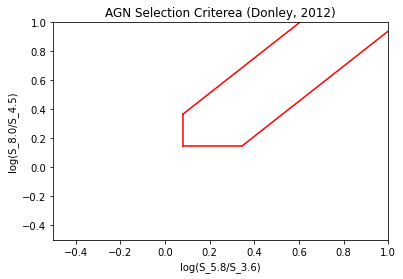

In [12]:
import matplotlib.pyplot as plt

# ---- create plot of Donley 2012 AGN selection box

# -- calculate lines   
 
# constants
x_min = 0.08    # x >= 0.08
y_min = 0.15    # y >= 0.15
max = 10        # arbritrary 

# calculate intercepts
x_int_ymin = (0.15 + 0.27)/1.21  # intercept between y_min and y_high 
y_int_xmin = (1.21*x_min) + 0.27 # intercept between x_min and y_low 

# calculate y_low points --> y >= 1.21x - 0.27
y1_low = (1.21*x_int_ymin) - 0.27   
y2_low = (1.21*max) - 0.27

# calculate y_high points --> y >= 1.21x + 0.27
y1_high = (1.21*x_min) + 0.27
y2_high = (1.21*max) + 0.27

# -- plotting lines

# plot  
plt.plot( [x_min, x_min], [y_min, y_int_xmin], 'r') # x >= 0.08
plt.plot( [x_min, x_int_ymin], [y_min, y_min], 'r') # y >= 0.15
plt.plot( [x_int_ymin, max], [y1_low,y2_low], 'r')  # y >= 1.21x - 0.27
plt.plot( [x_min, max], [y1_high,y2_high], 'r')     # y <= 1.21x + 0.27
    
# set axis range
plt.axis([-0.5,1,-0.5,1])

# naming the axis and title
plt.xlabel('log(S_5.8/S_3.6)') 
plt.ylabel('log(S_8.0/S_4.5)') 
plt.title('AGN Selection Criterea (Donley, 2012)') 
    
# function to show the plot 
plt.show() 

/tmp/ipykernel_3765/2090572473.py:4: RuntimeWarning: divide by zero encountered in log10
  x = np.log10( data['IRAC Ch 3'] / data['IRAC Ch 1'] ) # x = log10 ( f_5.6um / f_3.6um )
/tmp/ipykernel_3765/2090572473.py:5: RuntimeWarning: divide by zero encountered in true_divide
  y = np.log10( data['IRAC Ch 4'] / data['IRAC Ch 2'] ) # y = log10 ( f_8.0um / f_4.5 um )
/tmp/ipykernel_3765/2090572473.py:5: RuntimeWarning: divide by zero encountered in log10
  y = np.log10( data['IRAC Ch 4'] / data['IRAC Ch 2'] ) # y = log10 ( f_8.0um / f_4.5 um )


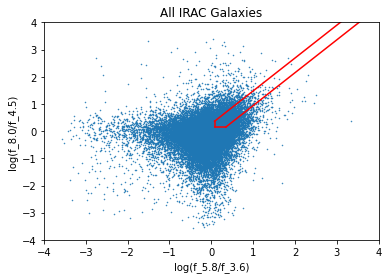

Galaxy count:  62883


In [13]:
# -- calculate and plot color for each galaxy

# calculate colors for each galaxy
x = np.log10( data['IRAC Ch 3'] / data['IRAC Ch 1'] ) # x = log10 ( f_5.6um / f_3.6um )
y = np.log10( data['IRAC Ch 4'] / data['IRAC Ch 2'] ) # y = log10 ( f_8.0um / f_4.5 um )

# plot each galaxy as a point
plt.plot(x, y, 'o', markersize=0.5)

# plot selection box
plt.plot( [x_min, x_min], [y_min, y_int_xmin], 'r') # x >= 0.08
plt.plot( [x_min, x_int_ymin], [y_min, y_min], 'r') # y >= 0.15
plt.plot( [x_int_ymin, max], [y1_low,y2_low], 'r')  # y >= 1.21x - 0.27
plt.plot( [x_min, max], [y1_high,y2_high], 'r')     # y <= 1.21x + 0.27

# set axis range
plt.axis([-4,4,-4,4])

# set text
plt.xlabel('log(f_5.8/f_3.6)') 
plt.ylabel('log(f_8.0/f_4.5)') 
plt.title('All IRAC Galaxies') 

# show plot
plt.show()

# print number of galaxies
print('Galaxy count: ', len(x))

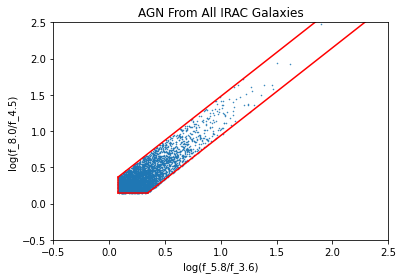

AGN count:  4133


In [14]:
# -- only include galaxies in AGN box

# initialize lists
x_agn = []
y_agn = []

# look through each galaxy and check if it is inside the selection box
for i in range(len(x)):
    # check for valid 
    if(x[i]>=0.08 and y[i]>=0.15 and y[i]>=(1.21*x[i]-0.27) and y[i]<=(1.21*x[i]+0.27)):  
        x_agn.append(x[i])
        y_agn.append(y[i])

# plot each galaxy as a point
plt.plot(x_agn, y_agn, 'o', markersize=0.5)

# plot selection box
plt.plot( [x_min, x_min], [y_min, y_int_xmin], 'r') # x >= 0.08
plt.plot( [x_min, x_int_ymin], [y_min, y_min], 'r') # y >= 0.15
plt.plot( [x_int_ymin, max], [y1_low,y2_low], 'r')  # y >= 1.21x - 0.27
plt.plot( [x_min, max], [y1_high,y2_high], 'r')     # y <= 1.21x + 0.27

# set axis range
plt.axis([-0.5,2.5,-0.5,2.5])

# set text
plt.xlabel('log(f_5.8/f_3.6)') 
plt.ylabel('log(f_8.0/f_4.5)') 
plt.title('AGN From All IRAC Galaxies') 

# show plot
plt.show()

# print number of AGN
print('AGN count: ', len(x_agn))

/tmp/ipykernel_3765/14468530.py:7: RuntimeWarning: divide by zero encountered in log10
  x = np.log10( data['IRAC Ch 3'] / data['IRAC Ch 1'] ) # x = log10 ( f_5.6um / f_3.6um )
/tmp/ipykernel_3765/14468530.py:8: RuntimeWarning: divide by zero encountered in log10
  y = np.log10( data['IRAC Ch 4'] / data['IRAC Ch 1'] ) # y = log10 ( S_8.0um / S_3.6 um )


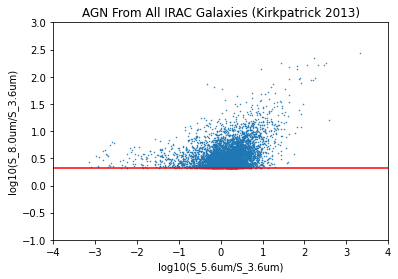

AGN count:  6170


In [21]:
# Kirkpatrick 2013 criteria 


# -- only include galaxies in AGN box

# calculate colors for each galaxy
x = np.log10( data['IRAC Ch 3'] / data['IRAC Ch 1'] ) # x = log10 ( f_5.6um / f_3.6um )
y = np.log10( data['IRAC Ch 4'] / data['IRAC Ch 1'] ) # y = log10 ( S_8.0um / S_3.6 um )

# initialize lists
x_agn = []
y_agn = []

# look through each galaxy and check if it is inside the selection box
for i in range(len(x)):
    # check for valid 
    if(y[i]>0.32) :  
        x_agn.append(x[i])
        y_agn.append(y[i])

# plot each galaxy as a point
plt.plot(x_agn, y_agn, 'o', markersize=0.5)

# plot selection box
plt.plot( [-4,4], [0.32, 0.32], 'r') # y > 0.32


# set axis range
plt.axis([-4,4,-1,3])

# set text
plt.xlabel('log10(S_5.6um/S_3.6um)') 
plt.ylabel('log10(S_8.0um/S_3.6um)') 
plt.title('AGN From All IRAC Galaxies (Kirkpatrick 2013)') 

# show plot
plt.show()

# print number of AGN
print('AGN count: ', len(x_agn))
